# Clinical Predictive Analytics: Diabetes Progression Modeling

## 1. Project Overview
**Objective:** To predict the quantitative measure of disease progression one year after baseline using diagnostic metrics.

**Methodology:**
This project utilizes the **UCI Diabetes Dataset** via the Scikit-Learn library. We will employ regression analysis techniques to model the relationship between physiological features (Age, BMI, BP, Blood Serum levels) and disease progression.

**Workflow:**
1.  **Data Acquisition:** Loading the standardized dataset.
2.  **Exploratory Data Analysis (EDA):** Visualizing correlations.
3.  **Preprocessing:** Data splitting and scaling.
4.  **Model Development:** Comparing Decision Trees vs. Random Forests.
5.  **Evaluation:** Analyzing Residuals, MAE, and $R^2$ scores.
6.  **Deployment Simulation:** Testing the model on unseen patient cases.

In [8]:
# Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Modules
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Visualization Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully.")

Libraries imported successfully.


## 2. Data Loading & Inspection
We load the diabetes dataset as a DataFrame.
* **Features:** 10 baseline variables (age, sex, bmi, average blood pressure, and six blood serum measurements).
* **Target:** A quantitative measure of disease progression one year after baseline.

In [9]:
# Load dataset
diabetes = load_diabetes(as_frame=True)
df = diabetes.frame

# Rename columns for clarity (optional, but helpful for analysis)
# s1-s6 are blood serum measurements
print(f"Dataset Shape: {df.shape}")
print(f"Features: {diabetes.feature_names}")

# Display first 5 rows
display(df.head())

Dataset Shape: (442, 11)
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 3. Exploratory Data Analysis (EDA)
Before training, we check the correlation between features and the target variable to understand which factors influence disease progression the most.

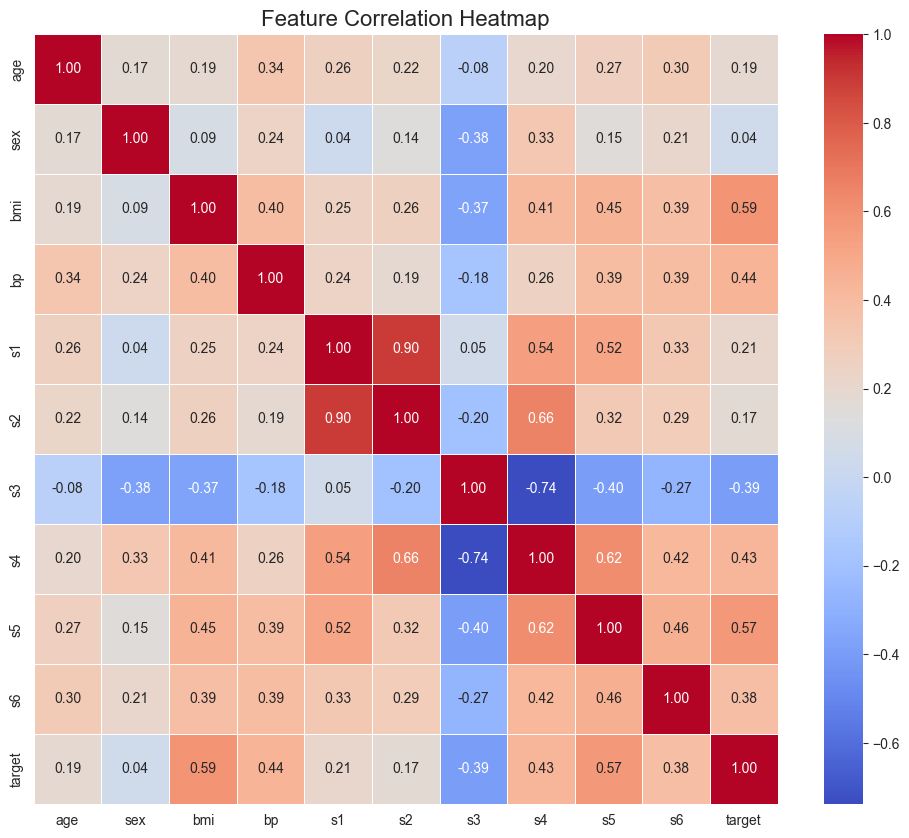

Observation: BMI and S5 (Lamotrigine) show strong positive correlations with the target.


In [10]:
# Correlation Matrix
corr_matrix = df.corr()

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

print("Observation: BMI and S5 (Lamotrigine) show strong positive correlations with the target.")

## 4. Data Preprocessing
We perform an 80/20 train-test split.
* **Note:** The Scikit-Learn Diabetes dataset comes pre-scaled (centered and scaled by the standard deviation times the square root of `n_samples`). However, for best practices, we will re-apply a `StandardScaler` to the split data to ensure no data leakage occurs from the test set to the training set.

In [11]:
# Define Features (X) and Target (y)
X = df.drop(columns='target')
y = df['target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Scaler
scaler = StandardScaler()

# Fit on Training data ONLY, then transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data splitting and scaling complete.")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Data splitting and scaling complete.
Training samples: 353
Testing samples: 89


## 5. Model Development
We will train two regression models and compare their baseline performance.
1.  **Decision Tree Regressor:** Prone to overfitting but highly interpretable.
2.  **Random Forest Regressor:** An ensemble method that generally provides higher accuracy by averaging multiple trees.

In [12]:
# 1. Decision Tree
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_preds = dt_model.predict(X_test_scaled)

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

print("Models trained successfully.")

Models trained successfully.


## 6. Prediction Accuracy & Evaluation
Since this is a regression task, we evaluate using:
* **$R^2$ Score:** Explains the variance (Higher is better, max 1.0).
* **RMSE (Root Mean Squared Error):** The standard deviation of the prediction errors (Lower is better).
* **MAE (Mean Absolute Error):** The average magnitude of errors.

--- Decision Tree Performance ---
R² Score: 0.3345
MAE:      45.94
RMSE:     59.38

--- Random Forest Performance ---
R² Score: 0.4384
MAE:      44.43
RMSE:     54.55



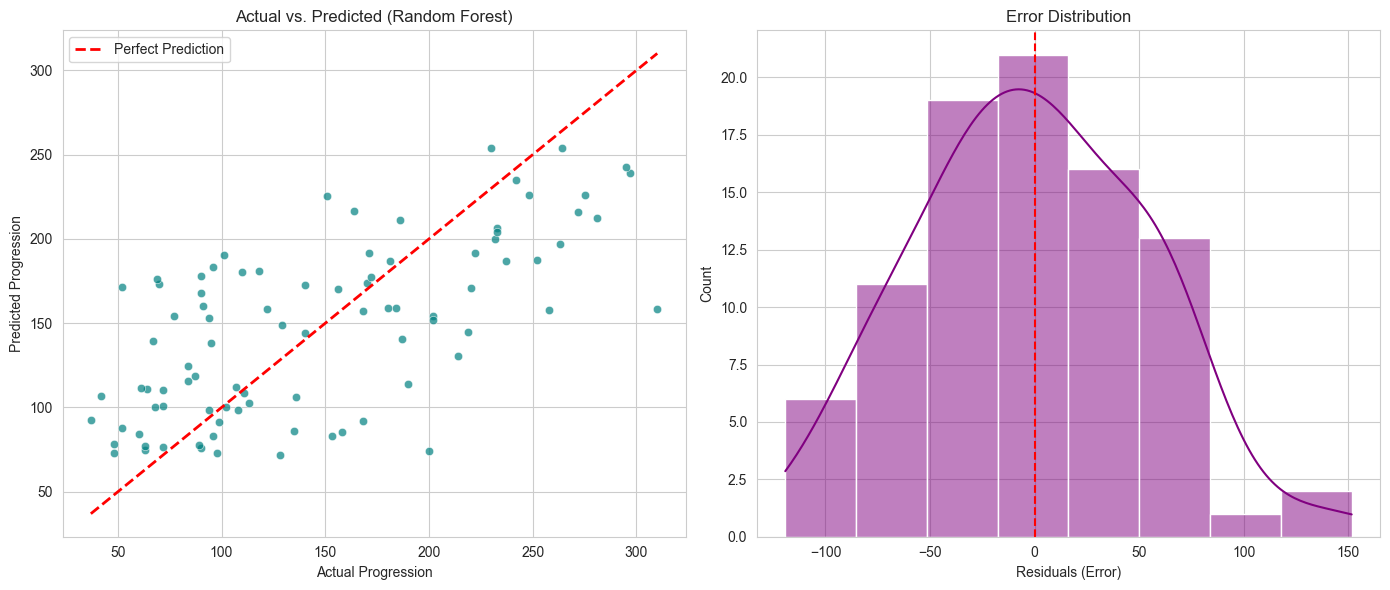

In [13]:
def evaluate_model(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    print(f"--- {name} Performance ---")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE:      {mae:.2f}")
    print(f"RMSE:     {rmse:.2f}\n")

# Print Metrics
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# Visualization: Actual vs Predicted (Random Forest)
plt.figure(figsize=(14, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=rf_preds, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs. Predicted (Random Forest)")
plt.legend()

# Residual Plot
residuals = y_test - rf_preds
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True, color='purple')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel("Residuals (Error)")
plt.title("Error Distribution")

plt.tight_layout()
plt.show()

## 7. Clinical Simulation (User Input Testing)
In a real-world scenario, a doctor would input patient data to get a prognosis. 

**Note on Input:** The Scikit-Learn dataset is pre-normalized using a specific technique that is difficult to replicate manually with raw numbers (e.g., Age=25). To simulate a realistic test, we will sample a random patient from our test set to mimic a "new" patient entry and generate a diagnostic report.

In [20]:
def generate_diagnosis_report(model, X_data, y_data, patient_idx=None):
    """
    Simulates a clinical prediction for a specific patient.
    """
    # Pick a random patient if index not provided
    if patient_idx is None:
        patient_idx = np.random.randint(0, len(X_data))
    
    # Extract data
    patient_features = X_data[patient_idx].reshape(1, -1)
    actual_score = y_data.iloc[patient_idx]
    
    # Predict
    predicted_score = model.predict(patient_features)[0]
    error = abs(predicted_score - actual_score)
    
    # Generate Report
    print(f"====== CLINICAL DIAGNOSIS REPORT ======")
    print(f"Patient ID:      #{patient_idx}")
    print(f"---------------------------------------")
    print(f"Predicted Disease Progression: {predicted_score:.2f}")
    print(f"Actual Disease Progression:    {actual_score:.2f}")
    print(f"---------------------------------------")
    print(f"Model Error Margin:            {error:.2f}")
    
    if predicted_score > 200:
        print("Status: HIGH RISK - Immediate intervention recommended.")
    elif predicted_score > 100:
        print("Status: MODERATE RISK - Monitor lifestyle changes.")
    else:
        print("Status: LOW RISK - Routine checkups sufficient.")
    print("=======================================")

# Run simulation on a random patient from the test set
generate_diagnosis_report(rf_model, X_test_scaled, y_test)

====== CLINICAL DIAGNOSIS REPORT ======
Patient ID:      #3
---------------------------------------
Predicted Disease Progression: 253.87
Actual Disease Progression:    230.00
---------------------------------------
Model Error Margin:            23.87
Status: HIGH RISK - Immediate intervention recommended.
